<a href="https://colab.research.google.com/github/JPT35/CS430_Projects/blob/main/MLA4_JPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard Imports

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Mounting to Google Drive

In [117]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Imports for specific models

In [118]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


# Imports for Splitting data and Building pipeline

In [119]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for performance measures

In [147]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

# Confusion Matrix Function

In [121]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# Function for a straight line on a plot

In [122]:
def abline(slope, intercept, color):
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = intercept + slope * x_vals
  plt.plot(x_vals, y_vals, '--', c=color)

#Creating Data Frame for CSV file "banknote_authentication"

In [123]:
df = pd.read_csv('/content/gdrive/MyDrive/CS-430/banknote_authentication.csv')

In [124]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Splitting Data into Train/Test

In [125]:
X = df.drop(['forgery'], axis=1)
y = df['forgery']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Building the pipeline

In [127]:
num_attribs = ['variance','skewness', 'curtosis', 'entropy',]
cat_attribs = ['forgery']

# Column Transformer

In [128]:
columnT = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs)])

In [129]:
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

pipeline = Pipeline(steps=[('columnT', columnT), ('classifier', dtc)])

In [130]:
pipeline = Pipeline(steps=[('columnT', columnT), ('classifier', dtc)])

# Fitting pipeline

In [131]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columnT',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10))])

# Running pipeline

In [132]:
y_pred = pipeline.predict(X_test)

# Plotting CM, getting recall, precision and F1

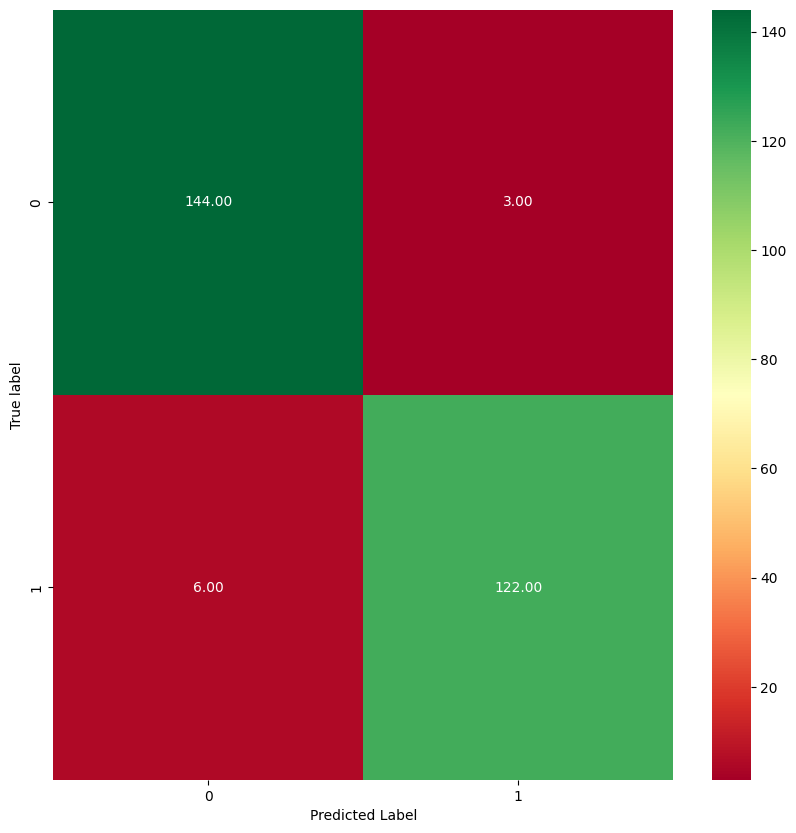

In [133]:
plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [53]:
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Precision: 0.943
Recall: 0.975
F1 score: 0.958


# Interpretation of results:

Based on the confusion matrix, there are 3 false positives and 6 false negatives for forgery.  The precision, recall and F1 score are all well above .90.

From this informationn I would conclude that the model is correctly identifying forgery at a high rate and is an effective model with some room for improvement.

# DecisionTree Regression to predict whether the usage in KWH for the steel industry data

In [134]:
df =  pd.read_csv('/content/gdrive/MyDrive/CS-430/Steel_industry_data.csv')

In [135]:
df = df.rename(columns={'Usage_kWh':'usage_kwh','Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh','Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh','Lagging_Current_Power_Factor':'lag_current_pwr','Leading_Current_Power_Factor':'lead_current_pwr','NSM':'nsm','WeekStatus':'week_status','Day_of_week':'day_of_week','Load_Type':'load_type'})

In [136]:
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [137]:
X = df.drop(columns=['date', 'usage_kwh'])
y = df['usage_kwh']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=24)

In [139]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',]
cat_attribs = ['week_status', 'day_of_week', 'load_type']

In [140]:
col_transform = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)])

In [141]:
pipeline = Pipeline([
    ('col_transform', col_transform),
    ('decision_tree', DecisionTreeRegressor(max_depth=5))
])

In [142]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

In [143]:
y_pred = pipeline.predict(X_test)

In [144]:
y_pred = pipeline.predict(X_test)

# Visualizing the tree:

[Text(0.5, 0.9166666666666666, 'x[2] <= 0.214\nsamples = 28032\nvalue = 27.466'),
 Text(0.25, 0.75, 'x[2] <= 0.071\nsamples = 17976\nvalue = 5.386'),
 Text(0.125, 0.5833333333333334, 'x[0] <= 0.234\nsamples = 16764\nvalue = 3.901'),
 Text(0.0625, 0.4166666666666667, 'x[0] <= 0.118\nsamples = 16740\nvalue = 3.758'),
 Text(0.03125, 0.25, 'x[15] <= 0.5\nsamples = 16734\nvalue = 3.747'),
 Text(0.015625, 0.08333333333333333, 'samples = 3690\nvalue = 4.767'),
 Text(0.046875, 0.08333333333333333, 'samples = 13044\nvalue = 3.459'),
 Text(0.09375, 0.25, 'x[0] <= 0.127\nsamples = 6\nvalue = 34.228'),
 Text(0.078125, 0.08333333333333333, 'samples = 1\nvalue = 76.75'),
 Text(0.109375, 0.08333333333333333, 'samples = 5\nvalue = 25.724'),
 Text(0.1875, 0.4166666666666667, 'x[0] <= 0.406\nsamples = 24\nvalue = 103.212'),
 Text(0.15625, 0.25, 'x[15] <= 0.5\nsamples = 11\nvalue = 77.974'),
 Text(0.140625, 0.08333333333333333, 'samples = 9\nvalue = 84.384'),
 Text(0.171875, 0.08333333333333333, 'samples

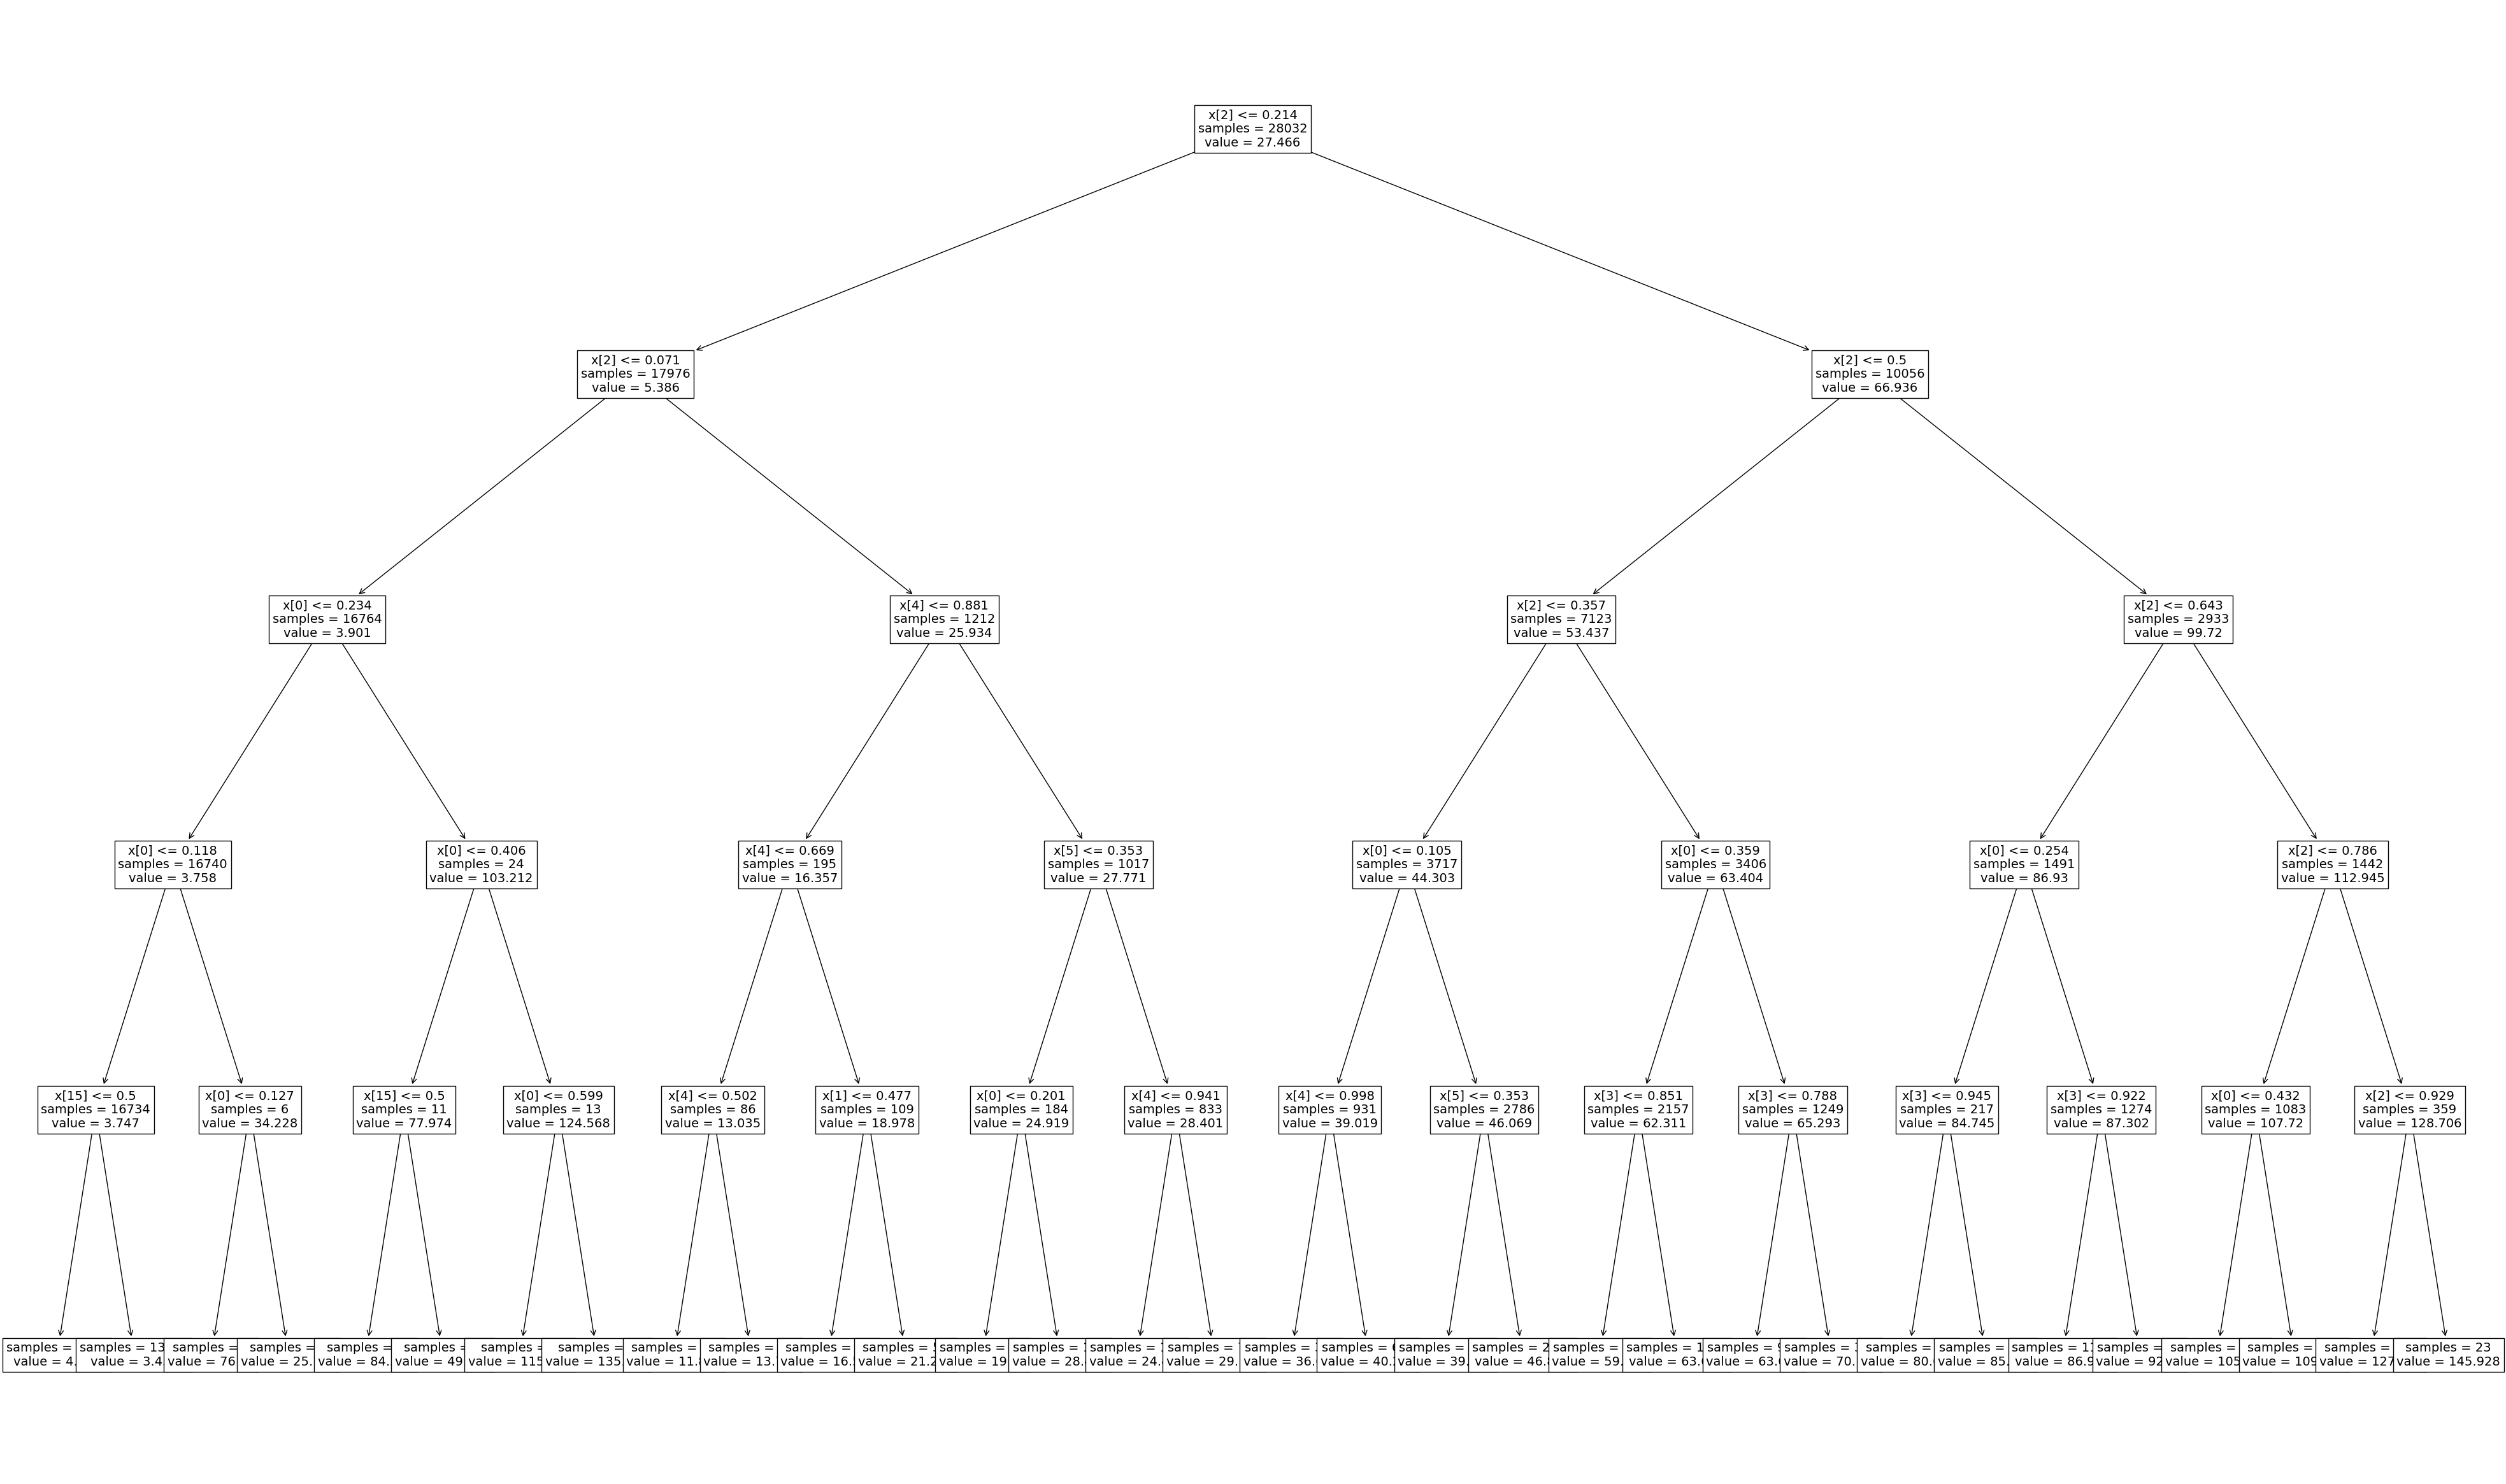

In [155]:
fig = plt.figure(figsize=(50, 30))
tree.plot_tree(pipeline.named_steps.decision_tree, fontsize=14, impurity=False)

In [145]:
from math import sqrt

In [150]:
train_set = sqrt(mean_squared_error(y_train, pipeline.predict(X_train)))


In [151]:

test_set = sqrt(mean_squared_error(y_test, y_pred))

In [152]:
print(train_set)

3.541903987587041


In [153]:
print(test_set)

3.509972741481287


# Interpretation:

Because the RMSE for the train and test set are within 1/100 of each other, there would appear that there are no issues with over/under fitting.  This would be a suitable model for testing regression with a decision tree. 